In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Explore the first few rows and get basic info
print(data.head())
print(data.info())


   instance  number  sup  cpm    mis  misr dir   omega  class  comb. class  \
0         1       0    3    0  120.0  21.0  ao  1000.0      1          7.0   
1         1       1    3    0   55.0   7.5  aa  1000.0      1          7.0   
2         1       2    3    0   26.0   1.4  vo  1000.0      1          7.0   
3         1       3    3    0   11.0   0.8  va  1000.0      1          7.0   
4         1       4    2    0    7.0   5.5  ao  1000.0      1          7.0   

   other class  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instance     9254 non-null   int64  
 1   number       9254 non-null   int64  
 2   sup          9254 non-null   int64  
 3   cpm          9254 non-null   int64  
 4   mis          9254 non-null   float64
 5   misr         9254 non-n

In [5]:
print(data.columns)

Index(['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega',
       'class', 'comb. class', 'other class'],
      dtype='object')


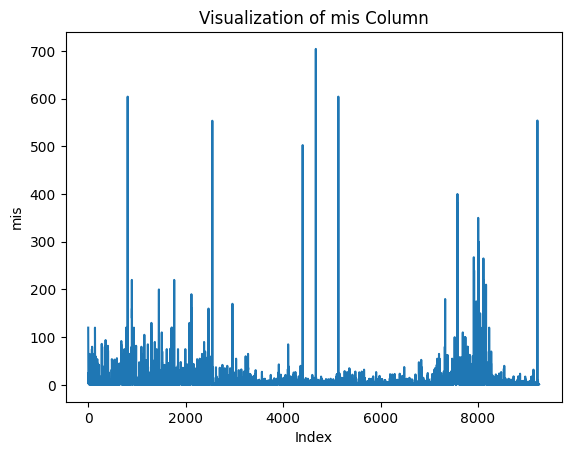

In [6]:
import matplotlib.pyplot as plt

# Plot the 'mis' column
plt.plot(data['mis'])
plt.title('Visualization of mis Column')
plt.xlabel('Index')
plt.ylabel('mis')
plt.show()

Outliers (Z-score method): [   0   76   80  139  140  278  342  357  403  675  679  680  742  776
  777  810  892  896  897  898  938  939  983 1092 1152 1224 1297 1298
 1299 1367 1404 1450 1451 1509 1510 1612 1686 1710 1711 1720 1765 1843
 1993 2078 2079 2117 2118 2123 2378 2465 2469 2473 2477 2478 2547 2955
 2959 2960 2964 2965 2968 4103 4401 4671 5133 7318 7324 7325 7520 7530
 7571 7572 7573 7577 7579 7581 7582 7585 7687 7711 7732 7740 7786 7790
 7913 7919 7963 7969 8003 8011 8043 8053 8083 8110 8111 8116 8117 8163
 8164 8228 9218]


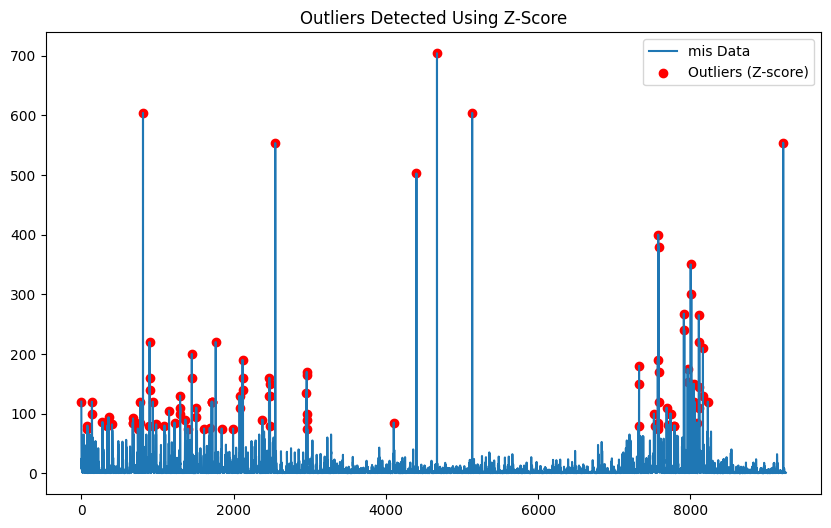

Outliers (IQR method): 0       120.0
1        55.0
2        26.0
5        25.0
6        13.0
        ...  
9137     32.0
9138     26.5
9147     17.0
9148     14.0
9218    554.0
Name: mis, Length: 1000, dtype: float64


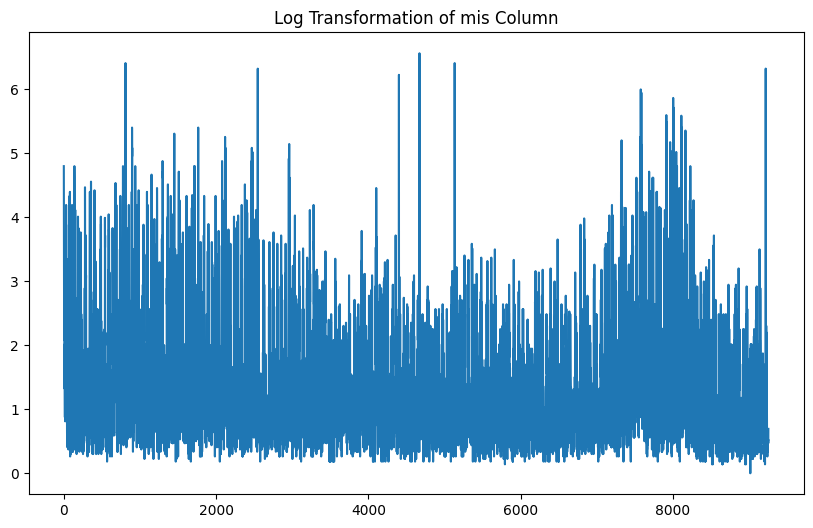

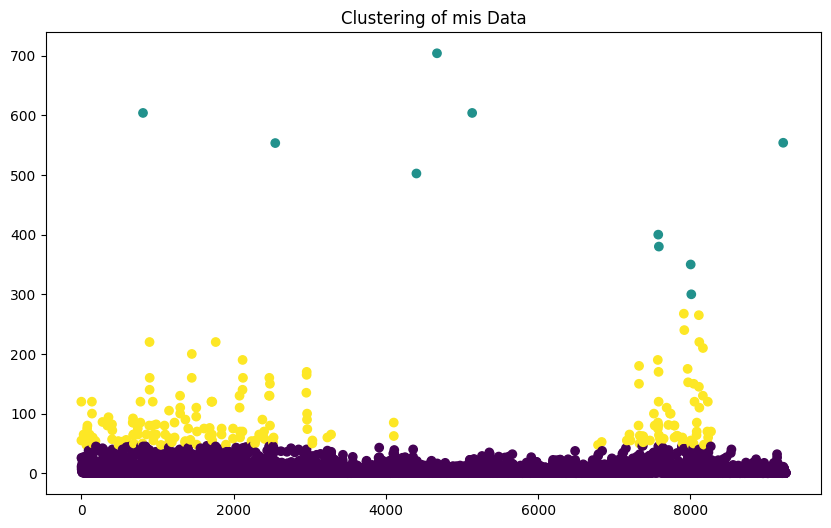

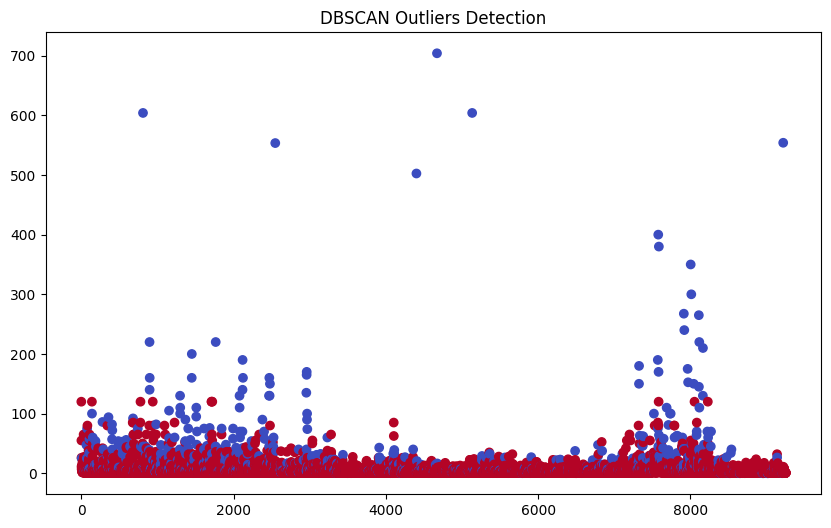

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Load your data
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Checking the 'mis' column
mis_data = data['mis']

# 1. Outlier Detection with Z-Score
from scipy.stats import zscore
z_scores = zscore(mis_data)
outliers_zscore = np.where(np.abs(z_scores) > 3)[0]  # Points with Z-score > 3 are considered outliers
print(f"Outliers (Z-score method): {outliers_zscore}")

# Plot the data with outliers marked
plt.figure(figsize=(10, 6))
plt.plot(mis_data, label='mis Data')
plt.scatter(outliers_zscore, mis_data[outliers_zscore], color='red', label='Outliers (Z-score)')
plt.title("Outliers Detected Using Z-Score")
plt.legend()
plt.show()

# 2. Outlier Detection using IQR (Interquartile Range)
Q1 = mis_data.quantile(0.25)
Q3 = mis_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = mis_data[(mis_data < lower_bound) | (mis_data > upper_bound)]
print(f"Outliers (IQR method): {outliers_iqr}")

# 3. Log Transformation to reduce skewness
mis_data_log = np.log1p(mis_data)  # log(1 + x) to avoid log(0)
plt.figure(figsize=(10, 6))
plt.plot(mis_data_log)
plt.title("Log Transformation of mis Column")
plt.show()

# 4. Clustering with K-Means to detect similar patterns
# Reshape the data for clustering
mis_data_reshaped = mis_data.values.reshape(-1, 1)
scaler = StandardScaler()
mis_data_scaled = scaler.fit_transform(mis_data_reshaped)

kmeans = KMeans(n_clusters=3, random_state=42)  # Let's say we assume 3 clusters for simplicity
kmeans.fit(mis_data_scaled)
data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data)), mis_data, c=data['cluster'], cmap='viridis', label='Clustered Data')
plt.title("Clustering of mis Data")
plt.show()

# 5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # dbscan with LOF
data['lof_outliers'] = dbscan.fit_predict(mis_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data)), mis_data, c=data['lof_outliers'], cmap='coolwarm', label='DBSCAN Outliers')
plt.title("DBSCAN Outliers Detection")
plt.show()

In [9]:
# Remove outliers from the 'mis' column
clean_data = mis_data.drop(outliers_zscore)

In [11]:
# Cap outliers to a maximum value (e.g., 300)
capped_data = mis_data.clip(upper=300)

In [12]:
# Apply log transformation (already discussed)
mis_data_log = np.log1p(mis_data)

In [14]:
# Remove outliers based on Z-score
data_no_outliers_zscore = data.drop(outliers_zscore)

# Check if outliers are removed
print(f"Data shape after Z-score outlier removal: {data_no_outliers_zscore.shape}")

Data shape after Z-score outlier removal: (9153, 13)


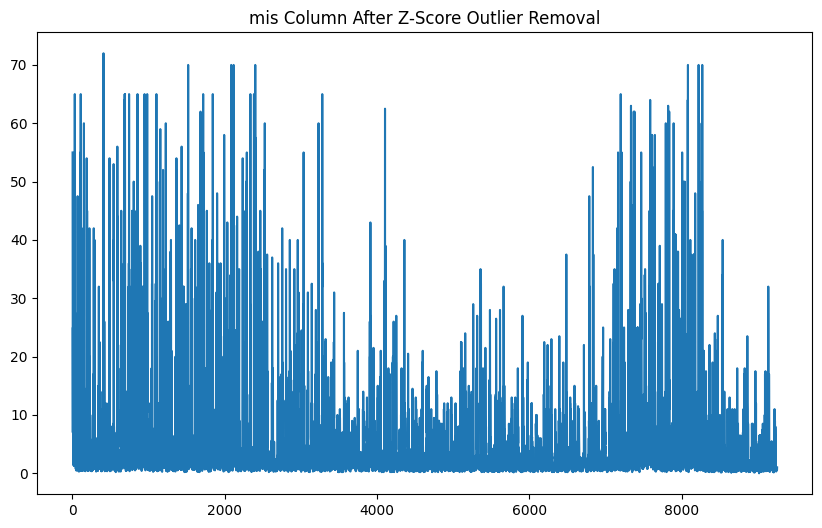

In [16]:
# Visualize the 'mis' column after Z-score outlier removal
plt.figure(figsize=(10, 6))
plt.plot(data_no_outliers_zscore['mis'])
plt.title("mis Column After Z-Score Outlier Removal")
plt.show()

In [17]:
# Statistical summary after removing Z-score outliers
print(data_no_outliers_zscore['mis'].describe())

count    9153.000000
mean        5.041651
std         8.493766
min         0.000000
25%         0.900000
50%         2.000000
75%         5.200000
max        72.000000
Name: mis, dtype: float64


In [19]:
# Save cleaned data to a new CSV file
data_no_outliers_zscore.to_csv('/home/ubuntu/Desktop/Extended/cleaned_mechanical_analysis.csv', index=False)

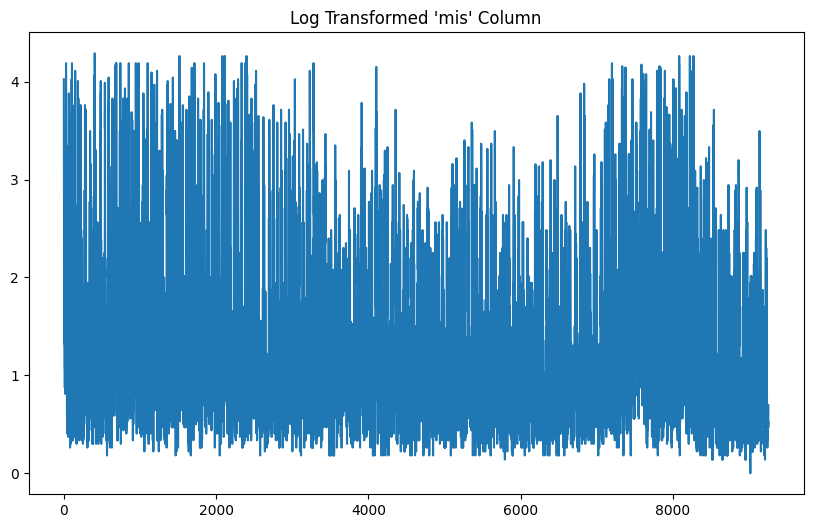

In [20]:
# Apply log transformation
mis_data_log = np.log1p(data_no_outliers_zscore['mis'])

# Visualize the log-transformed data
plt.figure(figsize=(10, 6))
plt.plot(mis_data_log)
plt.title("Log Transformed 'mis' Column")
plt.show()

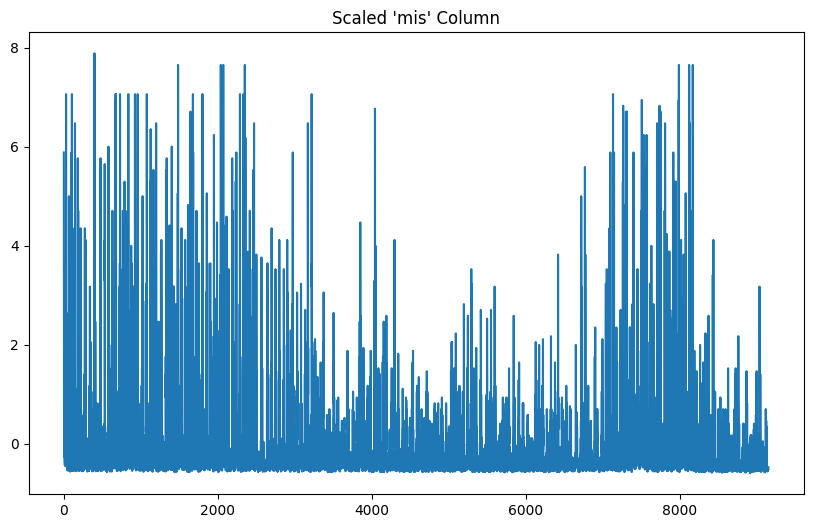

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mis_data_scaled = scaler.fit_transform(data_no_outliers_zscore[['mis']])

# Visualize the scaled data
plt.figure(figsize=(10, 6))
plt.plot(mis_data_scaled)
plt.title("Scaled 'mis' Column")
plt.show()

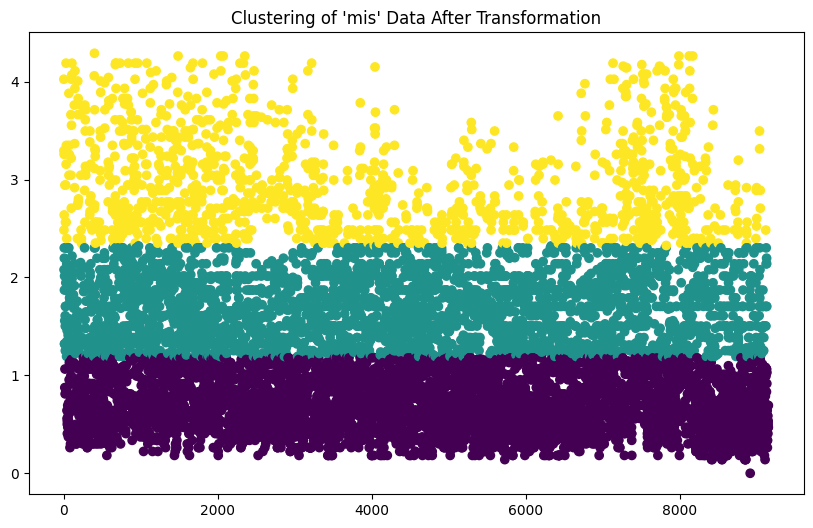

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reshape the data for clustering
mis_data_reshaped = mis_data_log.values.reshape(-1, 1)  # Use log-transformed data if applied

# Scale the data
scaler = StandardScaler()
mis_data_scaled = scaler.fit_transform(mis_data_reshaped)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's assume 3 clusters for simplicity
kmeans.fit(mis_data_scaled)
data_no_outliers_zscore['cluster'] = kmeans.labels_

# Visualize the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data_scaled)), mis_data_log, c=data_no_outliers_zscore['cluster'], cmap='viridis', label='Clustered Data')
plt.title("Clustering of 'mis' Data After Transformation")
plt.show()

Cluster Centroids:  [[-0.74514808]
 [ 0.41616177]
 [ 1.90663632]]


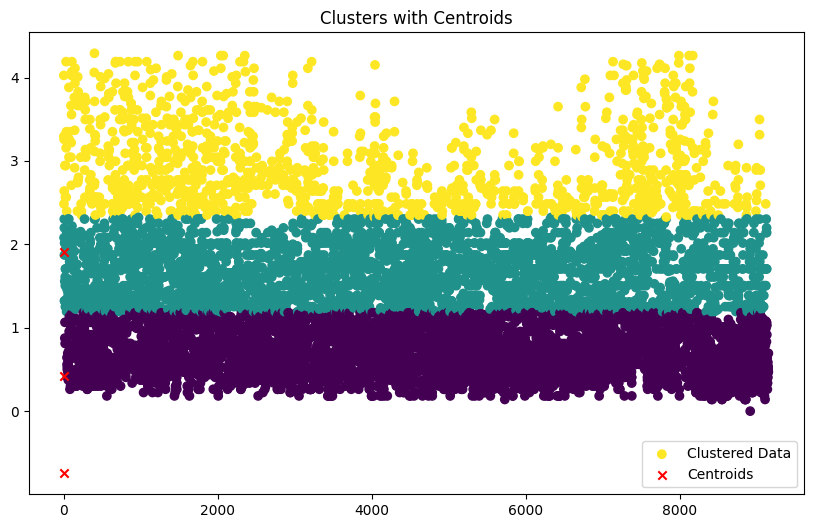

In [24]:
# Get the centroids (mean of the points in each cluster)
centroids = kmeans.cluster_centers_

# Display centroids
print("Cluster Centroids: ", centroids)

# Plot the clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data_scaled)), mis_data_log, c=data_no_outliers_zscore['cluster'], cmap='viridis', label='Clustered Data')
plt.scatter(range(len(centroids)), centroids, color='red', marker='x', label='Centroids')
plt.title("Clusters with Centroids")
plt.legend()
plt.show()

Intermediate Points:  [[-0.74514808]
 [-0.61611365]
 [-0.48707922]
 [-0.3580448 ]
 [-0.22901037]
 [-0.09997594]
 [ 0.02905849]
 [ 0.15809291]
 [ 0.28712734]
 [ 0.41616177]]


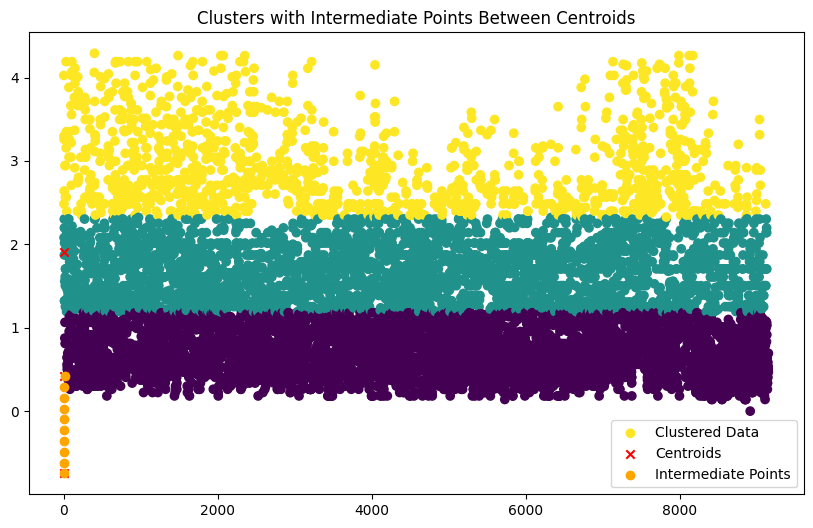

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example: Generate 10 points between the first two centroids
centroid_1 = centroids[0]
centroid_2 = centroids[1]

# Generate intermediate points by linear interpolation
n_points = 10
intermediate_points = np.linspace(centroid_1, centroid_2, n_points)

# Display the intermediate points
print("Intermediate Points: ", intermediate_points)

# Plot the intermediate points
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data_scaled)), mis_data_log, c=data_no_outliers_zscore['cluster'], cmap='viridis', label='Clustered Data')
plt.scatter(range(len(centroids)), centroids, color='red', marker='x', label='Centroids')
plt.scatter(range(len(intermediate_points)), intermediate_points, color='orange', marker='o', label='Intermediate Points')
plt.title("Clusters with Intermediate Points Between Centroids")
plt.legend()
plt.show()

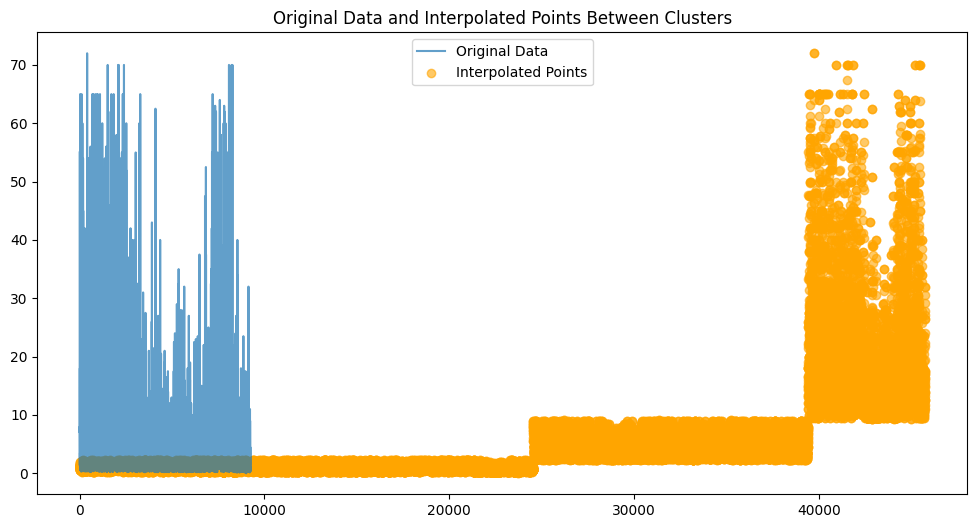

In [26]:
from scipy.interpolate import interp1d
import numpy as np

# Let's assume you have a clean dataset without outliers and the clustering labels
clustered_data = data_no_outliers_zscore.copy()

# Function to generate interpolated points between consecutive points in a cluster
def interpolate_points(cluster_data, n_interpolated_points=5):
    """
    Interpolates data points between consecutive points in the cluster.
    Returns the interpolated data points.
    """
    interpolated_points = []

    for cluster_id in np.unique(cluster_data['cluster']):
        # Get the data points in this cluster
        cluster_points = cluster_data[cluster_data['cluster'] == cluster_id]
        
        # For each consecutive pair of points in this cluster, interpolate
        for i in range(len(cluster_points) - 1):
            point1 = cluster_points.iloc[i]
            point2 = cluster_points.iloc[i + 1]
            
            # Create an interpolation function between point1 and point2
            interpolator = interp1d([0, 1], [point1['mis'], point2['mis']], kind='linear')
            
            # Interpolate n_interpolated_points values between point1 and point2
            interpolated_values = interpolator(np.linspace(0, 1, n_interpolated_points))
            
            # Append the interpolated points
            for value in interpolated_values:
                interpolated_points.append(value)

    return np.array(interpolated_points)

# Interpolate points between data points in each cluster
interpolated_values = interpolate_points(clustered_data)

# Plot the results: Original data vs. interpolated data
plt.figure(figsize=(12, 6))
plt.plot(data_no_outliers_zscore['mis'], label='Original Data', alpha=0.7)
plt.scatter(range(len(interpolated_values)), interpolated_values, color='orange', label='Interpolated Points', alpha=0.6)
plt.title("Original Data and Interpolated Points Between Clusters")
plt.legend()
plt.show()


In [34]:
# Checking the types of each column in the dataset
print(data.dtypes)

instance          int64
number            int64
sup               int64
cpm               int64
mis             float64
misr            float64
dir               int64
omega           float64
class             int64
comb. class     float64
other class     float64
cluster           int32
lof_outliers      int64
dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['dir'] = label_encoder.fit_transform(data['dir'])

In [30]:
data_encoded = pd.get_dummies(data, columns=['dir'], drop_first=True)

In [31]:
print(data.isnull().sum())  # Check for missing values in each column

instance           0
number             0
sup                0
cpm                0
mis                0
misr               0
dir                0
omega              0
class              0
comb. class     3828
other class     8327
cluster            0
lof_outliers       0
dtype: int64


In [32]:
data_encoded = pd.get_dummies(data, columns=['dir'], drop_first=True)

In [33]:
print(data.isnull().sum())  # Check for missing values in each column

instance           0
number             0
sup                0
cpm                0
mis                0
misr               0
dir                0
omega              0
class              0
comb. class     3828
other class     8327
cluster            0
lof_outliers       0
dtype: int64


In [35]:
data_cleaned = data.dropna()  # Drop rows with missing values

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)  # Apply scaling to the encoded data

In [38]:
# Check if there are any remaining missing values in the scaled data
import numpy as np

print(np.isnan(data_scaled).sum())

12155


In [39]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' if needed
data_imputed = imputer.fit_transform(data_encoded)  # Apply the imputer to the encoded data

# Now you can scale the data again if needed
scaler = StandardScaler()
data_scaled_imputed = scaler.fit_transform(data_imputed)

# Fit the KMeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled_imputed)

KMeans(n_clusters=5)

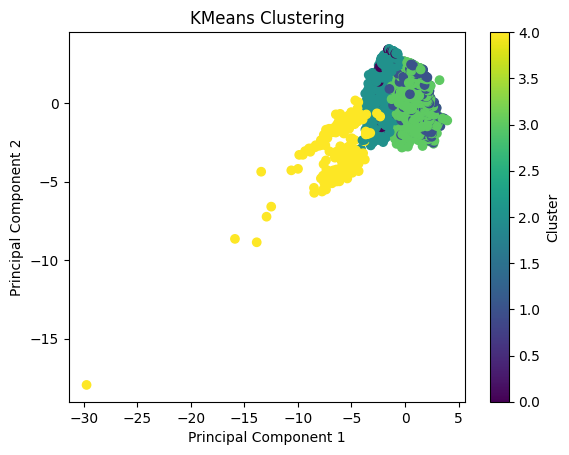

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_imputed)

# Plot the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled_imputed, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.16229318435283396


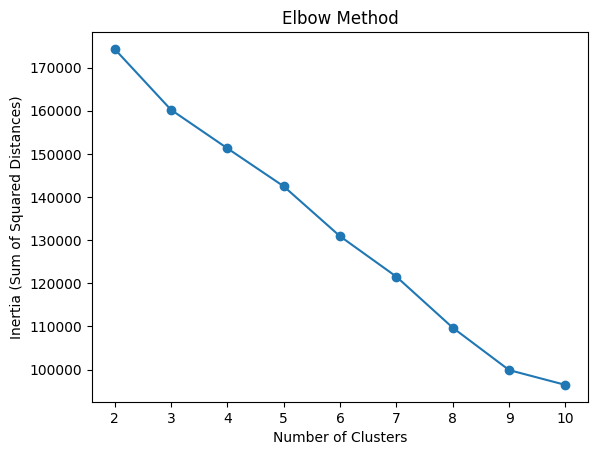

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of possible cluster numbers
cluster_range = range(2, 11)
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_imputed)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

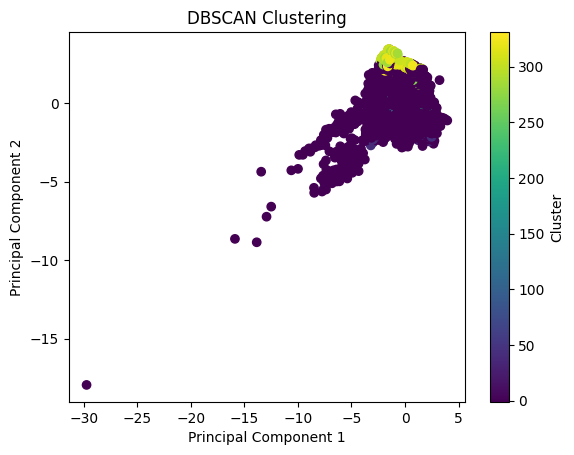

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(data_scaled_imputed)

# Plot DBSCAN clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

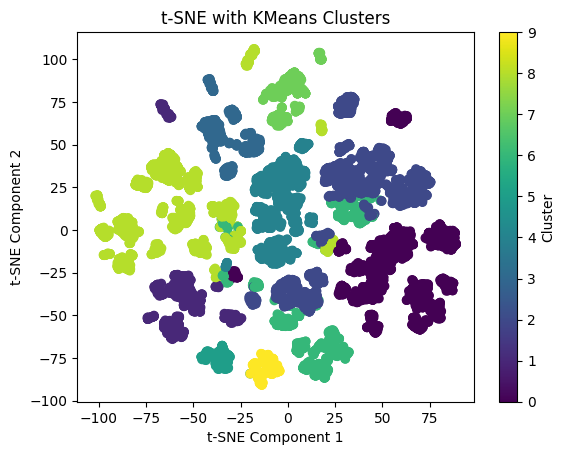

In [44]:
from sklearn.manifold import TSNE

# Reduce to 2D with t-SNE for better visualization
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled_imputed)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE with KMeans Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# Extract centroids from the fitted KMeans model
centroids = kmeans.cluster_centers_
print(centroids)

[[-5.58568831e-02  6.91566095e-01 -5.83576958e-02  5.32066162e-01
  -2.08588909e-01 -8.36566715e-02 -2.19608080e-02 -9.27157299e-02
   4.36737985e-02  1.93046190e-02 -1.45378164e-01  1.92205687e-01
  -3.08670614e-01 -2.52829470e-01 -3.81736063e-01 -6.26598783e-01
   2.12948092e+00 -1.52008844e-01 -2.21288246e-01 -3.08670614e-01
  -2.52587484e-01]
 [ 9.62826303e-02 -1.09494915e+00 -1.50358015e-01 -7.28909625e-01
   2.77295350e-01  2.60729262e-01 -9.88586598e-02  8.89501887e-02
   3.16280779e-02 -2.47861889e-02 -1.45378164e-01 -1.89538778e-01
   3.23969940e+00 -2.52829470e-01 -3.81736063e-01 -6.26598783e-01
  -4.69598009e-01 -1.52008844e-01 -2.21288246e-01 -3.08670614e-01
  -2.52587484e-01]
 [ 4.93229500e-01  4.99202972e-01  4.17744048e-02  5.17435481e-01
  -2.21553161e-01 -8.30543267e-02 -7.73426204e-02  2.92071593e-01
   4.61799896e-01 -9.59070374e-02 -1.45378164e-01  1.75198128e-01
  -3.08670614e-01 -2.52829470e-01 -3.81736063e-01  1.59591756e+00
  -4.69598009e-01 -1.52008844e-01 -2.2

In [46]:
import numpy as np

# Function to generate intermediate points between two centroids
def generate_intermediate_points(c1, c2, num_points=5):
    # Generate intermediate points between c1 and c2
    t_values = np.linspace(0, 1, num_points + 2)[1:-1]  # Generate points between 0 and 1, excluding 0 and 1
    intermediate_points = []
    
    for t in t_values:
        # Interpolate between c1 and c2
        p = c1 + t * (c2 - c1)
        intermediate_points.append(p)
        
    return np.array(intermediate_points)

# Example of generating intermediate points between the first two centroids
c1, c2 = centroids[0], centroids[1]
intermediate_points = generate_intermediate_points(c1, c2, num_points=5)

# Print the intermediate points
print("Intermediate points between Centroid 0 and Centroid 1:")
print(intermediate_points)

Intermediate points between Centroid 0 and Centroid 1:
[[-3.05002975e-02  3.93813554e-01 -7.36910823e-02  3.21903531e-01
  -1.27608199e-01 -2.62590158e-02 -3.47771167e-02 -6.24380768e-02
   4.16661784e-02  1.19561510e-02 -1.45378164e-01  1.28581609e-01
   2.82724388e-01 -2.52829470e-01 -3.81736063e-01 -6.26598783e-01
   1.69630110e+00 -1.52008844e-01 -2.21288246e-01 -3.08670614e-01
  -2.52587484e-01]
 [-5.14371198e-03  9.60610133e-02 -8.90244688e-02  1.11740899e-01
  -4.66274895e-02  3.11386398e-02 -4.75934253e-02 -3.21604237e-02
   3.96585583e-02  4.60768302e-03 -1.45378164e-01  6.49575317e-02
   8.74119390e-01 -2.52829470e-01 -3.81736063e-01 -6.26598783e-01
   1.26312128e+00 -1.52008844e-01 -2.21288246e-01 -3.08670614e-01
  -2.52587484e-01]
 [ 2.02128736e-02 -2.01691527e-01 -1.04357855e-01 -9.84217318e-02
   3.43532205e-02  8.85362955e-02 -6.04097339e-02 -1.88277063e-03
   3.76509382e-02 -2.74078497e-03 -1.45378164e-01  1.33345422e-03
   1.46551439e+00 -2.52829470e-01 -3.81736063e-01

In [47]:
# Generate intermediate points for all pairs of centroids
all_intermediate_points = []

for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):  # Only compute for pairs (i, j) where i < j
        c1, c2 = centroids[i], centroids[j]
        points = generate_intermediate_points(c1, c2, num_points=5)
        all_intermediate_points.append(points)

# Flatten the list of intermediate points and convert to a numpy array
all_intermediate_points = np.vstack(all_intermediate_points)

# Print all intermediate points
print("All intermediate points:")
print(all_intermediate_points)

All intermediate points:
[[-0.0305003   0.39381355 -0.07369108 ... -0.22128825 -0.30867061
  -0.25258748]
 [-0.00514371  0.09606101 -0.08902447 ... -0.22128825 -0.30867061
  -0.25258748]
 [ 0.02021287 -0.20169153 -0.10435786 ... -0.22128825 -0.30867061
  -0.25258748]
 ...
 [ 0.10629139  0.1404869   0.06624602 ... -0.22128825  0.55945534
  -0.25258748]
 [ 0.08825895  0.51240107  0.10521108 ... -0.22128825  0.27008002
  -0.25258748]
 [ 0.07022652  0.88431524  0.14417613 ... -0.22128825 -0.0192953
  -0.25258748]]


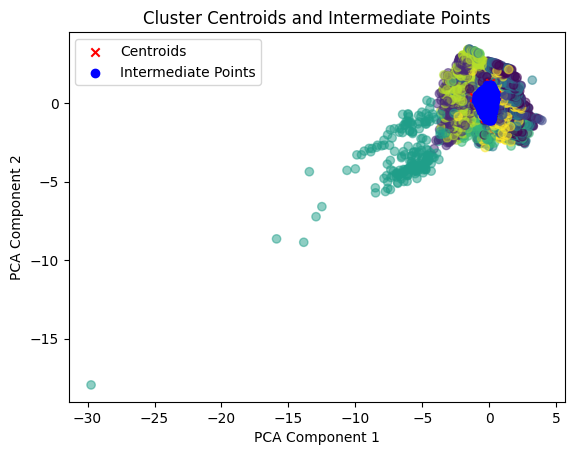

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization (if needed)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_imputed)

# Plot original data, centroids, and intermediate points
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.scatter(all_intermediate_points[:, 0], all_intermediate_points[:, 1], c='blue', marker='o', label='Intermediate Points')

plt.title('Cluster Centroids and Intermediate Points')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [52]:
# Check the number of columns in the data_scaled_imputed
print("Number of columns in data_scaled_imputed:", data_scaled_imputed.shape[1])

# Manually adjust the column names to match the shape of the dataset (21 columns in this case)
column_names = ['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 
                'class', 'comb. class', 'other class', 'cluster', 'lof_outliers', 
                'additional_column_1', 'additional_column_2', 'additional_column_3', 
                'additional_column_4', 'additional_column_5', 'additional_column_6', 
                'additional_column_7', 'additional_column_8']  # Replace with the correct names

# Ensure the number of column names matches the shape of the data
if len(column_names) != data_scaled_imputed.shape[1]:
    raise ValueError(f"Mismatch in the number of columns: {len(column_names)} columns provided, but data has {data_scaled_imputed.shape[1]} columns")

# Convert the numpy array to a DataFrame with the adjusted column names
data_scaled_imputed = pd.DataFrame(data_scaled_imputed, columns=column_names)

# Proceed with generating intermediate points and extending the data


Number of columns in data_scaled_imputed: 21


In [53]:
# Adjust the column names to match the 21 columns in the dataset
column_names = ['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 
                'class', 'comb. class', 'other class', 'cluster', 'lof_outliers',
                'additional_column_1', 'additional_column_2', 'additional_column_3', 
                'additional_column_4', 'additional_column_5', 'additional_column_6', 
                'additional_column_7', 'additional_column_8']  # Add more names as necessary

# Check that the length of column_names matches the number of columns in the dataset
if len(column_names) != data_scaled_imputed.shape[1]:
    raise ValueError(f"Mismatch in the number of columns: {len(column_names)} columns provided, but data has {data_scaled_imputed.shape[1]} columns")

# Convert the numpy array to a DataFrame with the adjusted column names
data_scaled_imputed = pd.DataFrame(data_scaled_imputed, columns=column_names)

# Proceed with generating intermediate points and extending the data

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming `data_scaled_imputed` is already a DataFrame with 21 columns
# Adjust the column names based on the actual data

column_names = ['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 
                'class', 'comb. class', 'other class', 'cluster', 'lof_outliers',
                'additional_column_1', 'additional_column_2', 'additional_column_3', 
                'additional_column_4', 'additional_column_5', 'additional_column_6', 
                'additional_column_7', 'additional_column_8']

# KMeans clustering (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=5, random_state=42)  # Example with 5 clusters
kmeans.fit(data_scaled_imputed)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Generate intermediate points between each pair of consecutive centers
def generate_intermediate_points(c1, c2, num_points=5):
    # Linearly interpolate between two points
    return np.linspace(c1, c2, num_points)

# List to store all intermediate points
all_intermediate_points = []

# Generate intermediate points for each pair of consecutive cluster centers
for i in range(len(cluster_centers) - 1):
    c1 = cluster_centers[i]
    c2 = cluster_centers[i + 1]
    
    # Generate intermediate points between c1 and c2
    intermediate_points = generate_intermediate_points(c1, c2, num_points=5)
    all_intermediate_points.append(intermediate_points)

# Stack all intermediate points into one array
all_intermediate_points = np.vstack(all_intermediate_points)

# Convert intermediate points into a DataFrame with appropriate column names
extended_data = pd.DataFrame(all_intermediate_points, columns=column_names[:all_intermediate_points.shape[1]])

# Step 2: Combine the original data with the generated intermediate points
combined_data = pd.concat([data_scaled_imputed, extended_data], ignore_index=True)

# Save the combined dataset to a CSV file
combined_data.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_extended.csv', index=False)

# Output the shape and some preview of the combined dataset
print(f"Shape of combined dataset: {combined_data.shape}")
print(combined_data.head())

Shape of combined dataset: (9274, 21)
   instance    number       sup      cpm       mis      misr       dir  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282 -1.989809   
1 -1.749334 -1.434939  0.432780 -0.72891  2.162500  1.228262 -1.989809   
2 -1.749334 -1.371308  0.432780 -0.72891  0.863760  0.151038 -1.989809   
3 -1.749334 -1.307677  0.432780 -0.72891  0.191999  0.045082 -1.989809   
4 -1.749334 -1.244046 -0.528792 -0.72891  0.012862  0.875074 -1.989809   

      omega     class  comb. class  ...   cluster  lof_outliers  \
0 -0.945235 -1.322366          0.0  ...  0.288709      3.239699   
1 -0.945235 -1.322366          0.0  ...  0.288709     -0.308671   
2 -0.945235 -1.322366          0.0  ...  0.288709     -0.308671   
3 -0.945235 -1.322366          0.0  ...  0.288709     -0.308671   
4 -0.945235 -1.322366          0.0  ...  0.288709      3.239699   

   additional_column_1  additional_column_2  additional_column_3  \
0            -0.252829            -0.381736   

In [58]:
import pandas as pd

# Define the paths to your original and extended CSV files
original_data_path = "/home/ubuntu/Desktop/Extended/mechanical_analysis.csv"  # Replace with the actual path
extended_data_path = "/home/ubuntu/Desktop/Extended/mechanical_analysis_extended.csv"  # Replace with the actual path

# Load the original and extended data
original_data = pd.read_csv(original_data_path)
combined_data = pd.read_csv(extended_data_path)  # Assuming you saved the extended dataset

# Check the first few rows of the data to ensure it's loaded correctly
print(original_data.head())
print(combined_data.head())

   instance  number  sup  cpm    mis  misr dir   omega  class  comb. class  \
0         1       0    3    0  120.0  21.0  ao  1000.0      1          7.0   
1         1       1    3    0   55.0   7.5  aa  1000.0      1          7.0   
2         1       2    3    0   26.0   1.4  vo  1000.0      1          7.0   
3         1       3    3    0   11.0   0.8  va  1000.0      1          7.0   
4         1       4    2    0    7.0   5.5  ao  1000.0      1          7.0   

   other class  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
   instance    number       sup      cpm       mis      misr       dir  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282 -1.989809   
1 -1.749334 -1.434939  0.432780 -0.72891  2.162500  1.228262 -1.989809   
2 -1.749334 -1.371308  0.432780 -0.72891  0.863760  0.151038 -1.989809   
3 -1.749334 -1.307677  0.432780 -0.72891  0.191999  0.045082 -1.989809   
4 -1.749334 -1.244046 -0.528792 -0.72891  0.012862  0.87507

In [60]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


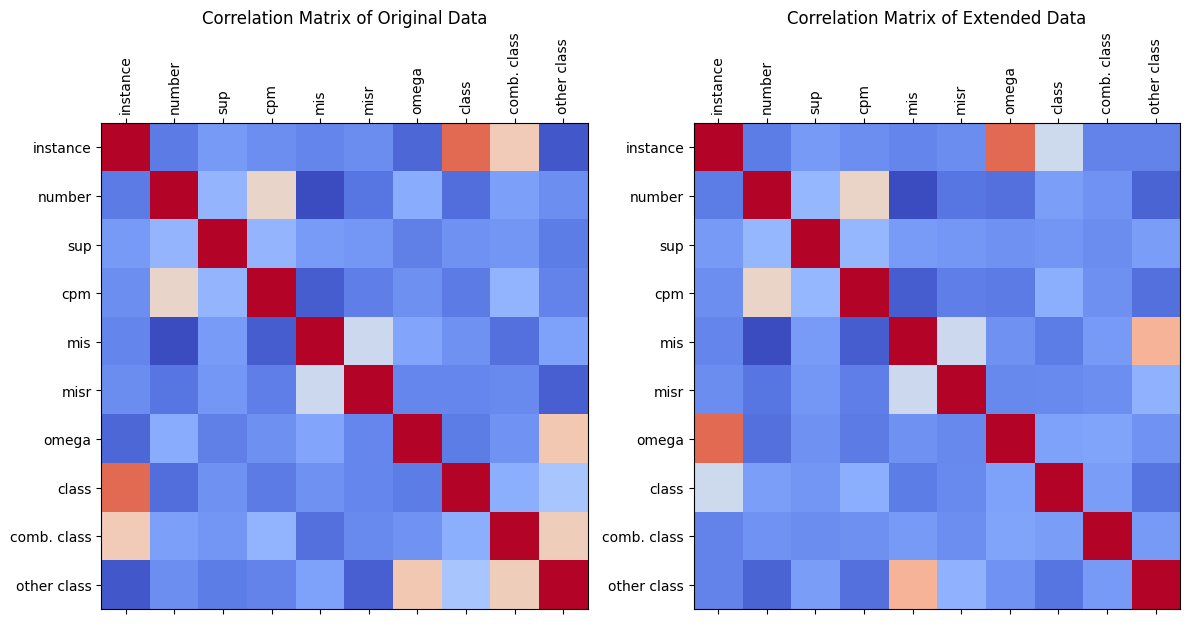

In [63]:
# Filter for numeric columns
numeric_columns = original_data.select_dtypes(include=[np.number]).columns
numeric_original_data = original_data[numeric_columns]
numeric_combined_data = combined_data[numeric_columns]

# Compute correlation matrices for numeric data
original_corr = numeric_original_data.corr()
extended_corr = numeric_combined_data.corr()

# Plot the correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot original data correlation matrix
axes[0].matshow(original_corr, cmap='coolwarm')
axes[0].set_title('Correlation Matrix of Original Data')
axes[0].set_xticks(range(original_corr.shape[1]))
axes[0].set_yticks(range(original_corr.shape[0]))
axes[0].set_xticklabels(original_corr.columns, rotation=90)
axes[0].set_yticklabels(original_corr.columns)

# Plot extended data correlation matrix
axes[1].matshow(extended_corr, cmap='coolwarm')
axes[1].set_title('Correlation Matrix of Extended Data')
axes[1].set_xticks(range(extended_corr.shape[1]))
axes[1].set_yticks(range(extended_corr.shape[0]))
axes[1].set_xticklabels(extended_corr.columns, rotation=90)
axes[1].set_yticklabels(extended_corr.columns)

plt.tight_layout()
plt.show()
